#Regularization Techniques in Linear Regression

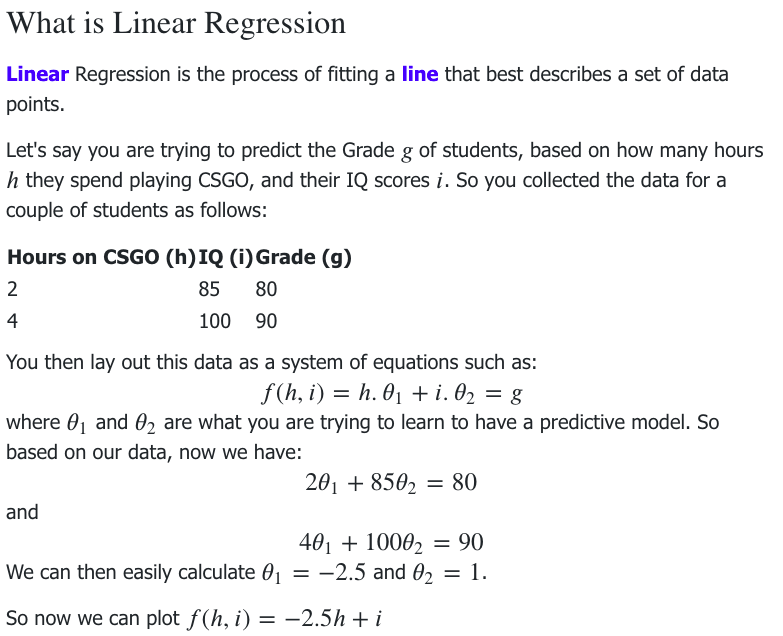

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

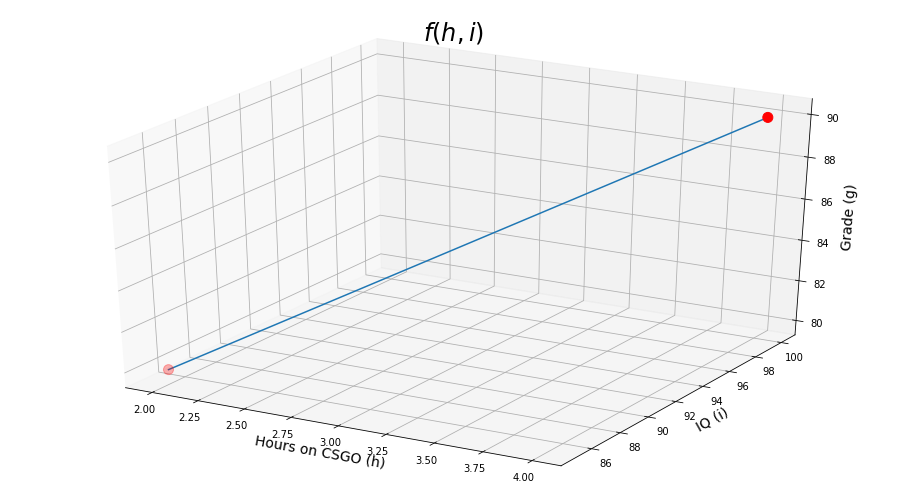

In [2]:
def grade(h, i):
    return -2.5 * h + i

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
h = np.array([2, 4]) # hours on CSGO from 0 to 10
i = np.array([85, 100]) # IQ from 70 to 130
grades = grade(h, i)
ax.plot(h, i, grades)

ax.scatter([2, 4],[85,100], [80, 90], s=100, c='red') # plotting our sample points

ax.set_xlabel("Hours on CSGO (h)", fontsize=14)
ax.set_ylabel("IQ (i)", fontsize=14)
ax.set_zlabel("Grade (g)", fontsize=14)
plt.title(r"$f(h,i)$", fontsize=24)
plt.show()

#Applying Linear Regression on Boston housing prices dataset

In [4]:
from sklearn.datasets import load_boston

# loading the data
X, y= load_boston(return_X_y=True) # we want both features matrix X, and labels vector y

X.shape # the dataset has 506 houses with 13 features (or predictors) for a house price in boston

(506, 13)

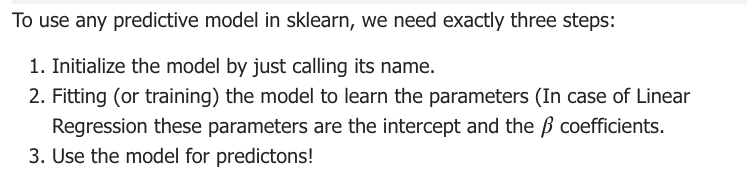

In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
# Initialize the model
lr = LinearRegression()
# training the model
# we pass in the features as well as the labels we want to map to (remember the CGSO and IQ = GPA example?)
lr.fit(X, y)
# we can now use the model for predictions! We will just give the same predictors
predictions = lr.predict(X)

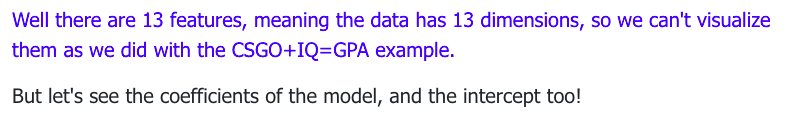

In [6]:
# here are the coefficients
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [7]:
# the intercept
lr.intercept_

36.459488385090125

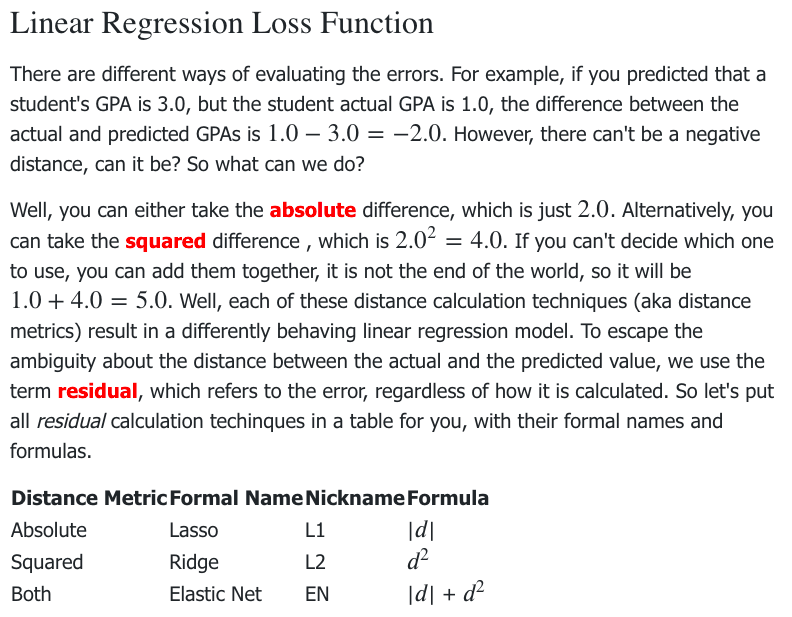

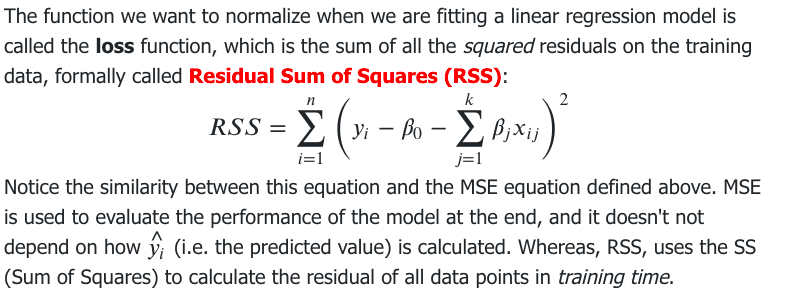

In [9]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error  # we will use MSE for evaluation
import matplotlib.pyplot as plt

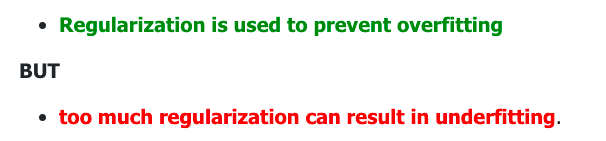

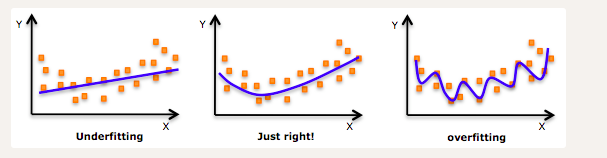

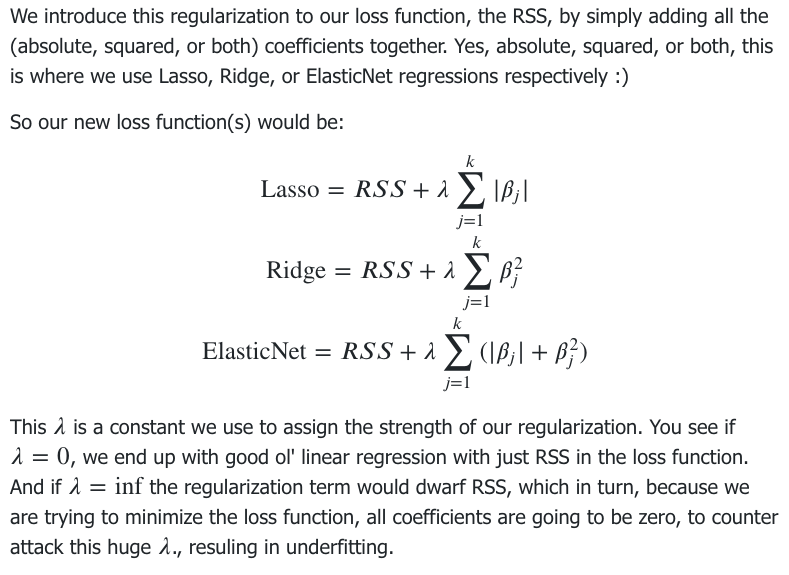

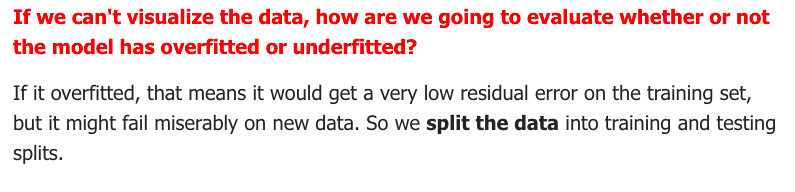

In [8]:
from sklearn.model_selection import train_test_split

# we set aside 20% of the data for testing, and use the remaining 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [11]:
def evaluate_model(Model, lambdas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for l in lambdas:
        # in sklearn, they refer to lambda as alpha, the name is different in different literature
        # Model will be either Lasso, Ridge or ElasticNet
        model = Model(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
        model.fit(X_train, y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

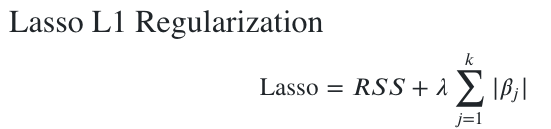

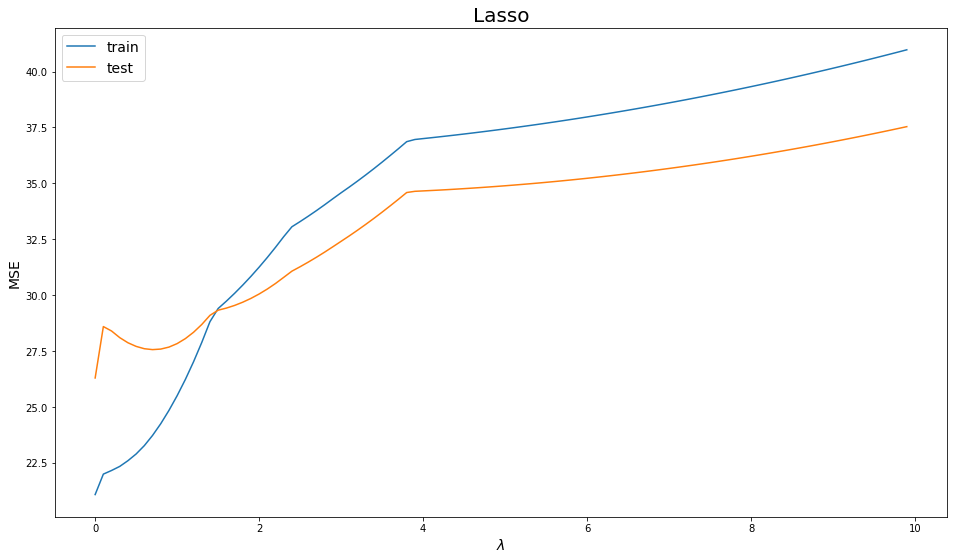

In [12]:
import warnings
warnings.filterwarnings('ignore')
# let's generate different values for lambda from 0 (no-regularization) and (10 too much regularization)
lambdas = np.arange(0, 10, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

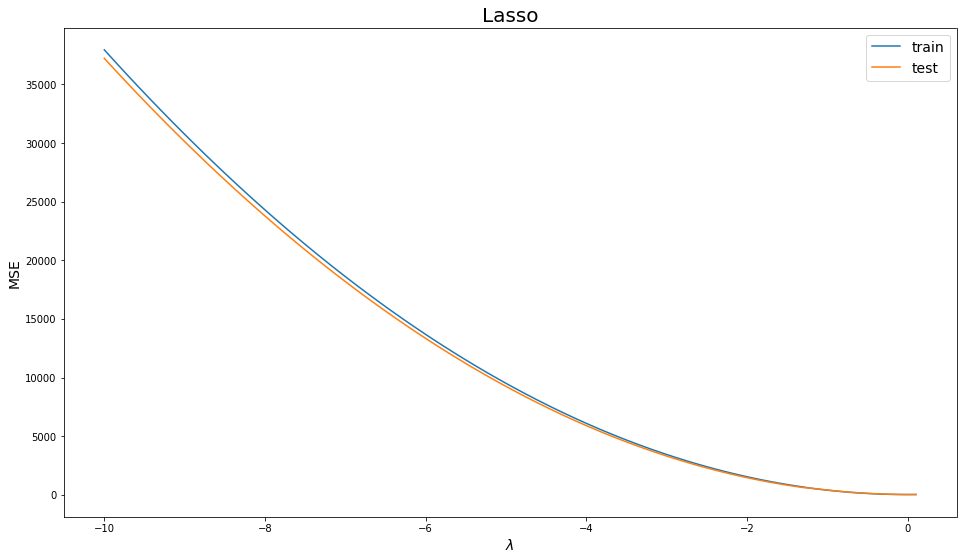

In [13]:
lambdas = np.arange(-10, 0.2, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")